# Multi variate time series modelling using LSTM

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf 
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import yfinance as yf
from stockstats import StockDataFrame

In [3]:
mpl.rcParams['figure.figsize'] = (12, 8)
mpl.rcParams['axes.grid'] = False

[*********************100%%**********************]  1 of 1 completed


array([<Axes: xlabel='Date'>], dtype=object)

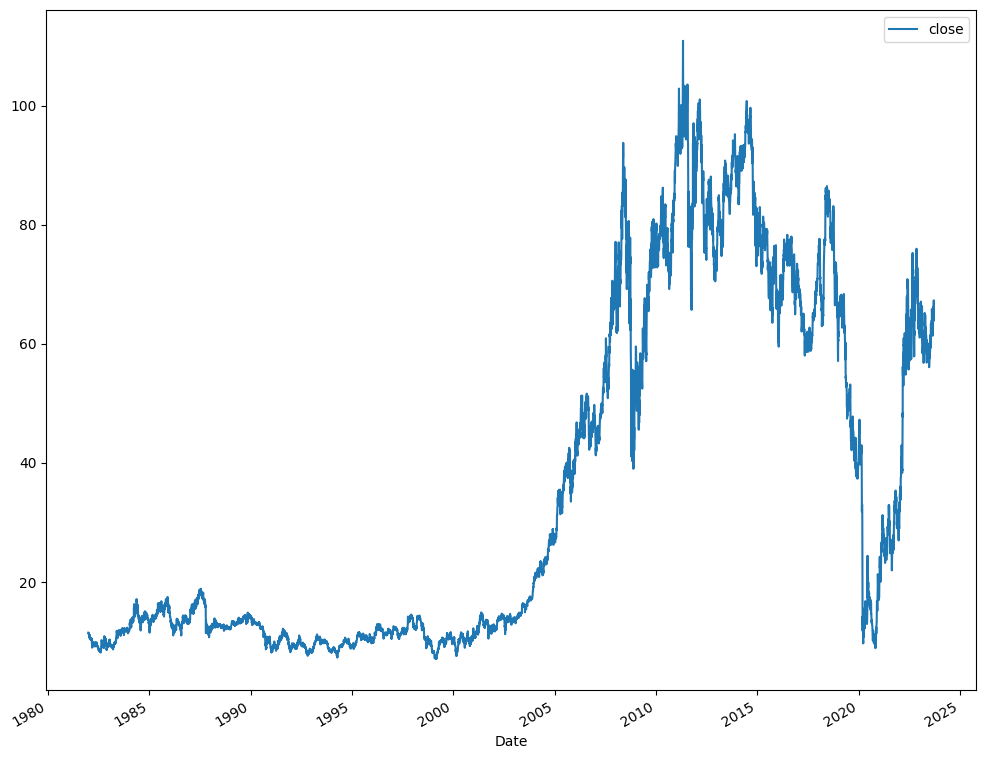

In [67]:
# df=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv")


# Define the list of stock tickers and the date range
stock_tickers = ['OXY']#, 'GOOGL', 'MSFT']  # Replace with your list of stock tickers
start_date = '1954-01-01'  # Replace with your desired start date
end_date = '2023-09-17'  # Replace with your desired end date
# end_date = datetime.today()

ticker = stock_tickers[0]

df = yf.download(ticker, start=start_date, end=end_date, auto_adjust=False)
df = StockDataFrame.retype(df)
TRAIN_SPLIT = int(df.shape[0] * 0.8)
# df.head()

features_considered = ['close']
features = df[features_considered]
features.index = df.index

features.plot(subplots=True,figsize=[12,10])

In [68]:
features.head()

,close
Date,
1981-12-31,11.496737
1982-01-04,11.496737
1982-01-05,11.317101
1982-01-06,11.376979
1982-01-07,11.376979


Attribute Information:

date time year-month-day hour:minute:second
Appliances, energy use in Wh
lights, energy use of light fixtures in the house in Wh
T1, Temperature in kitchen area, in Celsius
RH_1, Humidity in kitchen area, in %
T2, Temperature in living room area, in Celsius
RH_2, Humidity in living room area, in %
T3, Temperature in laundry room area
RH_3, Humidity in laundry room area, in %
T4, Temperature in office room, in Celsius
RH_4, Humidity in office room, in %
T5, Temperature in bathroom, in Celsius
RH_5, Humidity in bathroom, in %
T6, Temperature outside the building (north side), in Celsius
RH_6, Humidity outside the building (north side), in %
T7, Temperature in ironing room , in Celsius
RH_7, Humidity in ironing room, in %
T8, Temperature in teenager room 2, in Celsius
RH_8, Humidity in teenager room 2, in %
T9, Temperature in parents room, in Celsius
RH_9, Humidity in parents room, in %
To, Temperature outside (from Chievres weather station), in Celsius
Pressure (from Chievres weather station), in mm Hg
RH_out, Humidity outside (from Chievres weather station), in %
Wind speed (from Chievres weather station), in m/s
Visibility (from Chievres weather station), in km
Tdewpoint (from Chievres weather station), Â°C
rv1, Random variable 1, nondimensional
rv2, Random variable 2, nondimensional

In [6]:
# df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

# features['date'] = pd.to_datetime(features['Date'], infer_datetime_format=True)

In [7]:
# df.set_index('date')[['Appliances', 'lights','T_out', 'RH_1', 'Visibility']].plot(subplots=True)

In [8]:
df_input=features[['close']]

# Scaling

In [9]:
scaler = MinMaxScaler()
data_scaled=scaler.fit_transform(df_input)

In [10]:
data_scaled

array([[0.04267983],
       [0.04267983],
       [0.04094957],
       ...,
       [0.57073886],
       [0.58017828],
       [0.56910144]])

In [45]:
feature = data_scaled
target = data_scaled[:,0]

In [12]:
TimeseriesGenerator(feature,target,length=2,sampling_rate=1,batch_size=1)[0]

(array([[[0.04267983],
         [0.04267983]]]),
 array([0.04094957]))

# Train test split

In [13]:
xtrain,xtest,ytrain,ytest=train_test_split(feature,target,test_size=0.20,random_state=123,shuffle=False)

**shuffle=False is an important parameter while doing time series. As the values do not shuffle during the training process for sequence modelling.**

In [14]:
xtrain.shape

(8412, 1)

In [15]:
xtest.shape

(2103, 1)

In [16]:
ytrain.shape

(8412,)

In [17]:
win_length=20
batch_size=32
num_features=1
train_generator = TimeseriesGenerator(xtrain, ytrain, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(xtest, ytest, length=win_length, sampling_rate=1, batch_size=batch_size)

In [18]:
train_generator[0]

(array([[[0.04267983],
         [0.04267983],
         [0.04094957],
         [0.04152632],
         [0.04152632],
         [0.04037282],
         [0.03806579],
         [0.03864255],
         [0.03748903],
         [0.03518202],
         [0.03691229],
         [0.03748903],
         [0.03864255],
         [0.03864255],
         [0.03748903],
         [0.03518202],
         [0.03345177],
         [0.03287501],
         [0.03287501],
         [0.03864255]],
 
        [[0.04267983],
         [0.04094957],
         [0.04152632],
         [0.04152632],
         [0.04037282],
         [0.03806579],
         [0.03864255],
         [0.03748903],
         [0.03518202],
         [0.03691229],
         [0.03748903],
         [0.03864255],
         [0.03864255],
         [0.03748903],
         [0.03518202],
         [0.03345177],
         [0.03287501],
         [0.03287501],
         [0.03864255],
         [0.03575877]],
 
        [[0.04094957],
         [0.04152632],
         [0.04152632],
     

# Model - LSTM neural network

In [19]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.LSTM(128,input_shape=(win_length,num_features),return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))

model.add(tf.keras.layers.LSTM(128,return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.5))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.LSTM(64,return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(1))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 128)           66560     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 20, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 20, 128)           131584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 20, 128)           0         
                                                                 
 dropout (Dropout)           (None, 20, 128)           0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [21]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [22]:
model.compile(
    loss=tf.losses.MeanSquaredError(),
    optimizer=tf.optimizers.legacy.Adam(),
    # metrics=[tf.metrics.MeanAbsoluteError()]
    metrics=['accuracy']
)

In [23]:
history = model.fit_generator(
    train_generator,
    epochs=50,
    validation_data=test_generator,
    shuffle=False,
    callbacks = [early_stopping]
)

Epoch 1/50


/var/folders/ym/67x0srsx2ln9vy4qtlvtdv500000gn/T/ipykernel_22697/716798225.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(
2023-10-10 23:52:13.691221: I tensorflow/core/data/root_dataset.cc:62] `tf.data.Options` values set are 


263/263 [==============================] - ETA: 0s - loss: 0.0044 - accuracy: 2.3832e-04

2023-10-10 23:52:55.538470: I tensorflow/core/data/root_dataset.cc:62] `tf.data.Options` values set are 


263/263 [==============================] - 48s 139ms/step - loss: 0.0044 - accuracy: 2.3832e-04 - val_loss: 0.0477 - val_accuracy: 0.0000e+00
Epoch 2/50
263/263 [==============================] - 36s 137ms/step - loss: 0.0099 - accuracy: 2.3832e-04 - val_loss: 0.0867 - val_accuracy: 0.0000e+00
Epoch 3/50
263/263 [==============================] - 36s 138ms/step - loss: 0.0150 - accuracy: 2.3832e-04 - val_loss: 0.1562 - val_accuracy: 0.0000e+00
Epoch 4/50
263/263 [==============================] - 36s 139ms/step - loss: 0.0200 - accuracy: 2.3832e-04 - val_loss: 0.1844 - val_accuracy: 0.0000e+00
Epoch 5/50
263/263 [==============================] - 37s 140ms/step - loss: 0.0243 - accuracy: 2.3832e-04 - val_loss: 0.1486 - val_accuracy: 0.0000e+00
Epoch 6/50
263/263 [==============================] - 38s 144ms/step - loss: 0.0198 - accuracy: 2.3832e-04 - val_loss: 0.1212 - val_accuracy: 0.0000e+00


In [24]:
model.evaluate_generator(test_generator,verbose=0)

/var/folders/ym/67x0srsx2ln9vy4qtlvtdv500000gn/T/ipykernel_22697/267665090.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator,verbose=0)
2023-10-10 23:56:05.966226: I tensorflow/core/data/root_dataset.cc:62] `tf.data.Options` values set are 


[0.12119220942258835, 0.0]

In [25]:
predictions = model.predict_generator(test_generator)

/var/folders/ym/67x0srsx2ln9vy4qtlvtdv500000gn/T/ipykernel_22697/2745777454.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)
2023-10-10 23:56:10.068463: I tensorflow/core/data/root_dataset.cc:62] `tf.data.Options` values set are 


In [26]:
predictions.shape

(2083, 1)

In [27]:
predictions

array([[0.8079182 ],
       [0.80789745],
       [0.80783904],
       ...,
       [0.7986902 ],
       [0.79881656],
       [0.7989553 ]], dtype=float32)

In [28]:
ytest

array([0.66927106, 0.66927106, 0.66436708, ..., 0.57073886, 0.58017828,
       0.56910144])

In [29]:
xtest

array([[0.66927106],
       [0.66927106],
       [0.66436708],
       ...,
       [0.57073886],
       [0.58017828],
       [0.56910144]])

In [30]:
xtest.shape

(2103, 1)

In [31]:
xtest[:,1:][win_length:]

array([], shape=(2083, 0), dtype=float64)

In [32]:
df_pred=pd.concat([pd.DataFrame(predictions), pd.DataFrame(xtest[:,1:][win_length:])],axis=1)

In [33]:
df_pred

,0
0,0.807918
1,0.807897
2,0.807839
3,0.807807
4,0.807814
...,...
2078,0.798338
2079,0.798572
2080,0.798690
2081,0.798817


In [34]:
rev_trans=scaler.inverse_transform(df_pred)

In [35]:
rev_trans

array([[90.94403 ],
       [90.94188 ],
       [90.935814],
       ...,
       [89.98598 ],
       [89.9991  ],
       [90.013504]], dtype=float32)

In [38]:
df_final=df_input[predictions.shape[0]*-1:]

In [39]:
df_final.count()

close    2083
dtype: int64

In [40]:
df_final['Close_Pred']=rev_trans[:,0]

In [41]:
df_final

,close,Close_Pred
Date,,
2015-06-09,77.348282,90.944031
2015-06-10,78.695992,90.941879
2015-06-11,78.755890,90.935814
2015-06-12,77.647774,90.932495
2015-06-15,77.318336,90.933182
...,...,...
2023-09-11,63.840000,89.949394
2023-09-12,66.430000,89.973755
2023-09-13,66.320000,89.985977


<Axes: xlabel='Date'>

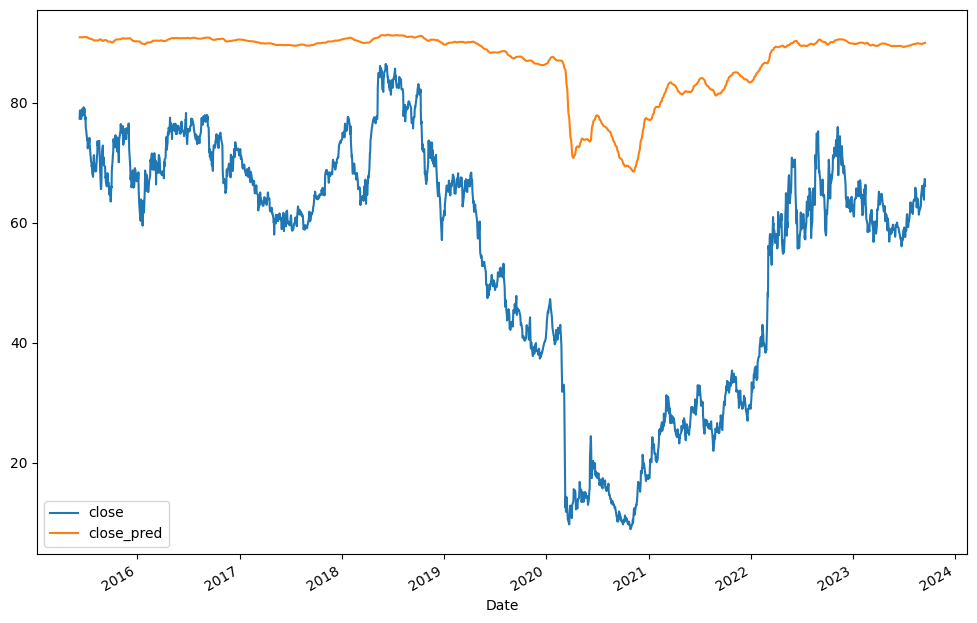

In [42]:
df_final[['close','Close_Pred']].plot()

In [71]:
xpre = features[-20:]

ypre = model.predict_generator(xpre)

ypre

/var/folders/ym/67x0srsx2ln9vy4qtlvtdv500000gn/T/ipykernel_22697/813538867.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  ypre = model.predict_generator(xpre)
2023-10-12 22:45:34.354966: I tensorflow/core/data/root_dataset.cc:62] `tf.data.Options` values set are distribute_options {
  auto_shard_policy: DATA
}
optimization_options {
  apply_default_optimizations: false
}
threading_options {
}
autotune_options {
}
warm_start: false



array([[0.39795893],
       [0.39786842],
       [0.39764923],
       [0.39735627],
       [0.3972295 ],
       [0.3973617 ],
       [0.3974694 ],
       [0.39751238],
       [0.39757416],
       [0.39761707],
       [0.39809167],
       [0.39851564],
       [0.39835566],
       [0.39809167],
       [0.39827928],
       [0.39789772],
       [0.39858097],
       [0.39855227],
       [0.39880702],
       [0.39850783]], dtype=float32)

,0,0
0,0.397959,0.549067
1,0.397868,0.545792
2,0.397649,0.537894
3,0.397356,0.527395
4,0.397229,0.522868
5,0.397362,0.527587
6,0.397469,0.531440
7,0.397512,0.532981
8,0.397574,0.535197
9,0.397617,0.536738


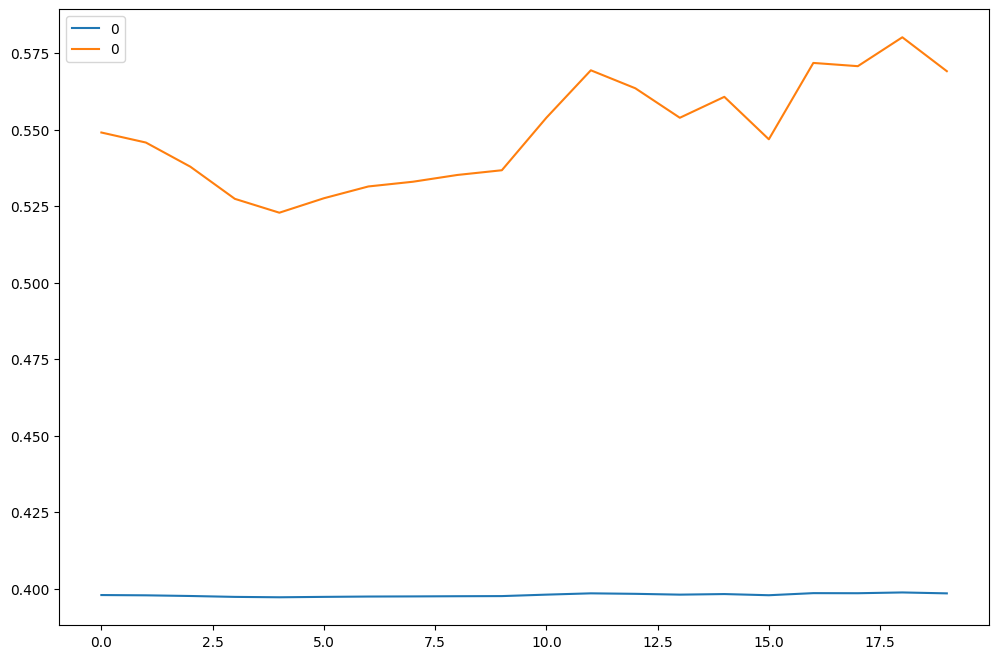

In [99]:
df_pred=pd.concat([pd.DataFrame(ypre), pd.DataFrame(xtest[:,:][-20:])],axis=1)

df_pred.plot()
# xtest[:,0:][-20:]

df_pred